In [292]:
import pandas as pd
import numpy as np

In [293]:
source = "actor_data.txt"
data = pd.read_table(source, sep='\t')

In [294]:
df = pd.DataFrame(data)

In [295]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11782665 entries, 0 to 11782664
Data columns (total 6 columns):
 #   Column             Dtype 
---  ------             ----- 
 0   nconst             object
 1   primaryName        object
 2   birthYear          object
 3   deathYear          object
 4   primaryProfession  object
 5   knownForTitles     object
dtypes: object(6)
memory usage: 539.4+ MB


In [296]:
df

,nconst,primaryName,birthYear,deathYear,primaryProfession,knownForTitles
0,nm0000001,Fred Astaire,1899,1987,"soundtrack,actor,miscellaneous","tt0053137,tt0072308,tt0050419,tt0031983"
1,nm0000002,Lauren Bacall,1924,2014,"actress,soundtrack","tt0071877,tt0038355,tt0037382,tt0117057"
2,nm0000003,Brigitte Bardot,1934,\N,"actress,soundtrack,music_department","tt0056404,tt0054452,tt0049189,tt0057345"
3,nm0000004,John Belushi,1949,1982,"actor,soundtrack,writer","tt0078723,tt0077975,tt0080455,tt0072562"
4,nm0000005,Ingmar Bergman,1918,2007,"writer,director,actor","tt0083922,tt0050976,tt0050986,tt0060827"
...,...,...,...,...,...,...
11782660,nm9993714,Romeo del Rosario,\N,\N,"animation_department,art_department","tt14069590,tt2455546,tt11657662"
11782661,nm9993716,Essias Loberg,\N,\N,NaN,\N
11782662,nm9993717,Harikrishnan Rajan,\N,\N,cinematographer,tt8736744
11782663,nm9993718,Aayush Nair,\N,\N,cinematographer,\N


In [297]:
type(df.iloc[11782660][0])

str

In [298]:
# drop rows with filter (similar like filtering with iloc/loc etc...)
filter_ = df["birthYear"] == '\\N'
df.drop(df[filter_].index, inplace=True)

df.drop(columns=["primaryProfession", "knownForTitles"], inplace=True)

In [299]:
df["birthYear"] = df["birthYear"].astype(int)

In [300]:
filter_ = df["birthYear"] >= 1997 
df.drop(df[filter_].index, inplace=True)

filter_ = df["birthYear"] < 1942
df.drop(df[filter_].index, inplace=True)

df = df[0:40_000]

In [301]:
# df.set_index("nconst", inplace=True)

In [302]:
df["deathYear"] = np.where(df["deathYear"] == "\\N", 2022, df["deathYear"])
df["deathYear"] = df["deathYear"].astype(int)

C:\Users\lazni\AppData\Local\Temp\ipykernel_19428\1307274600.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["deathYear"] = np.where(df["deathYear"] == "\\N", 2022, df["deathYear"])
C:\Users\lazni\AppData\Local\Temp\ipykernel_19428\1307274600.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["deathYear"] = df["deathYear"].astype(int)


In [303]:
df["currentAge"] = df["deathYear"] - df["birthYear"]
filter_ = df["currentAge"] <= 24 
df.drop(df[filter_].index, inplace=True)

C:\Users\lazni\AppData\Local\Temp\ipykernel_19428\2760692624.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["currentAge"] = df["deathYear"] - df["birthYear"]
C:\Users\lazni\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [304]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39929 entries, 3 to 302881
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   nconst       39929 non-null  object
 1   primaryName  39929 non-null  object
 2   birthYear    39929 non-null  int32 
 3   deathYear    39929 non-null  int32 
 4   currentAge   39929 non-null  int32 
dtypes: int32(3), object(2)
memory usage: 1.4+ MB


In [305]:
df.head()

,nconst,primaryName,birthYear,deathYear,currentAge
3,nm0000004,John Belushi,1949,1982,33
28,nm0000029,Margaux Hemingway,1954,1996,42
34,nm0000035,James Horner,1953,2015,62
83,nm0000084,Gong Li,1965,2022,57
84,nm0000085,Henner Hofmann,1950,2022,72


In [306]:
df["currentAge"].describe()

count    39929.000000
mean        59.567658
std         11.650494
min         25.000000
25%         51.000000
50%         60.000000
75%         69.000000
max         80.000000
Name: currentAge, dtype: float64

In [307]:
df.sort_values(by="currentAge", ascending=True)[:20]

,nconst,primaryName,birthYear,deathYear,currentAge
20725,nm0021518,Duane Allman,1946,1971,25
267629,nm0282309,Reid Flair,1988,2013,25
88715,nm0092992,Tommy Bolin,1951,1976,25
232852,nm0245584,Lynx Dyan,1976,2001,25
103427,nm0108508,Derrick Brice,1962,1987,25
181219,nm0190809,György Cséplö,1953,1978,25
221646,nm0233753,Françoise Dorléac,1942,1967,25
636,nm0000637,Tupac Shakur,1971,1996,25
120912,nm0127027,Christine Böhm,1954,1979,25
217054,nm0228873,Jim Dixon,1949,1974,25


In [308]:
print(df.iloc[0][0], df.iloc[0][-1])
print(df.iloc[1][0], df.iloc[1][-1])

nm0000004 33
nm0000029 42


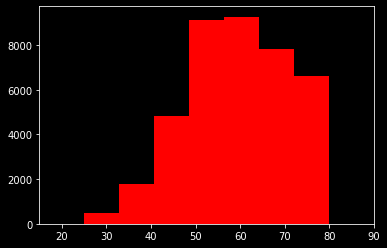

In [309]:
import matplotlib.pyplot as plt
plt.style.use("dark_background")
plt.hist(df["currentAge"], color="red", bins=7)
plt.xlim(15, 90)
plt.show()